In [1]:
from simulation_manager import *

In [2]:
from epi_model import *

In [3]:
from simulation_helper import *

In [8]:
from frozendict import frozendict as fzd

In [31]:
manager = simulation_manager()
manager.load_models('HS2')

In [60]:
ms_none = manager.models[fzd({'INITIAL_INFECT': 20, 'R0_mean': 2.5, 'VACCINATE_P': 0.20, 'strat': 'none'})]
ms_random = manager.models[fzd({'INITIAL_INFECT': 20, 'R0_mean': 2.5, 'VACCINATE_P': 0.10, 'strat': 'rand'})]
ms_strategic = manager.models[fzd({'INITIAL_INFECT': 20, 'R0_mean': 2.5, 'VACCINATE_P': 0.10, 'strat': 'friendHighDeg'})]

In [41]:
typs = ['numE', 'numI_pre', 'numI_sym', 'numI_asym', 'numR']

In [37]:
def getval(m, typ, t):
    t = np.where( m['tseries'] <= t )[0][-1]
    return m[typ][ t ]

In [74]:
def getseries(m, typs):
    return np.array( [
        sum( getval(m, typ, t) for typ in typs )
        for t in range(1, 100)
    ] )

In [39]:
getseries(m, typs)

array([23., 21., 17., 17., 17., 17., 16., 14., 14.,  8.,  6.,  5.,  6.,
        6.,  5.,  5.,  5.,  5.,  5.,  6.,  3.,  4.,  4.,  4.,  3.,  3.,
        2.,  2.,  2.,  2.,  3.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  2.,  2.,  2.,  1.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.])

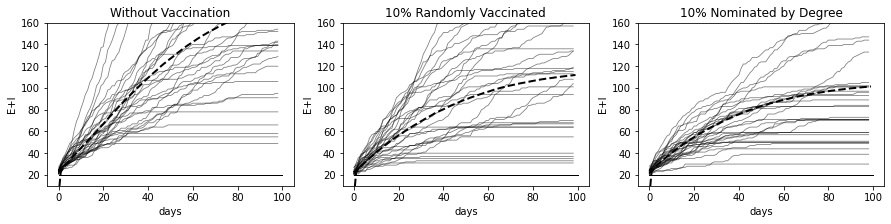

In [47]:
plt.figure(figsize=(15,3))
mss = [ms_none, ms_random, ms_strategic]
msname = ['Without Vaccination','10% Randomly Vaccinated','10% Nominated by Degree']
for i,(ms,name) in enumerate(zip(mss,msname)):
    plt.subplot(1,3,i+1)
    plt.title(name)
    mean_trend = [
        np.mean( [sum( getval(ms[i], typ, j) for typ in typs) for i in range(len(ms))] )
        for j in range(100)
    ]

    for i in range(30):
        m = ms[i]
        plt.plot( getseries(m, typs), color='black', alpha=0.5, linewidth=0.8 )
        
    plt.ylabel("E+I")
    plt.plot(mean_trend, linewidth=2, color='black', linestyle='--')

    plt.xlabel("days")
    plt.ylim(10,160)
    
    plt.plot([0,100],[20,20], color='black', linewidth=1)
    
plt.show()

In [64]:
tick_types = ['-', '--', 'dotted', '--', 'dotted']

In [60]:
ms_none = manager.models[fzd({'INITIAL_INFECT': 20, 'R0_mean': 2.5, 'VACCINATE_P': 0.20, 'strat': 'none'})]
ms_random = manager.models[fzd({'INITIAL_INFECT': 20, 'R0_mean': 2.5, 'VACCINATE_P': 0.10, 'strat': 'rand'})]
ms_strategic = manager.models[fzd({'INITIAL_INFECT': 20, 'R0_mean': 2.5, 'VACCINATE_P': 0.10, 'strat': 'friendHighDeg'})]

In [65]:
ms_random2 = manager.models[fzd({'INITIAL_INFECT': 20, 'R0_mean': 2.5, 'VACCINATE_P': 0.20, 'strat': 'rand'})]
ms_strategic2 = manager.models[fzd({'INITIAL_INFECT': 20, 'R0_mean': 2.5, 'VACCINATE_P': 0.20, 'strat': 'friendHighDeg'})]

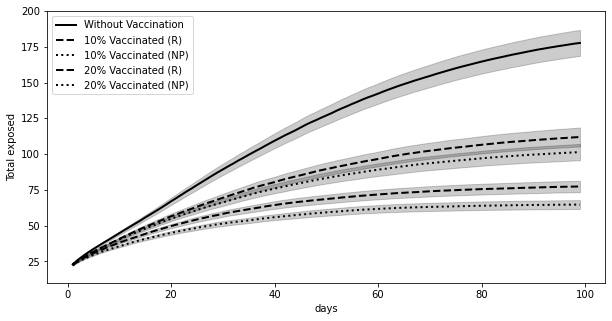

In [92]:
plt.figure(figsize=(10,5))
mss = [ms_none, ms_random, ms_strategic, ms_random2, ms_strategic2]
msname = ['Without Vaccination','10% Vaccinated (R)','10% Vaccinated (NP)','20% Vaccinated (R)','20% Vaccinated (NP)']
for i,(ms,name) in enumerate(zip(mss,msname)):
    #plt.subplot(1,3,i+1)
    #plt.title(name)
    mean_trend = [
        np.mean( [sum( getval(ms[i], typ, j) for typ in typs) for i in range(len(ms))] )
        for j in range(1,100)
    ]
    
    err_trend = np.std(
        np.array([
            getseries(m, typs)
            for m in ms
        ]), axis=0
    ) / np.sqrt(300)
        
    plt.ylabel("Total exposed")
    plt.plot(range(1,100), mean_trend, linewidth=2, color='black', linestyle=tick_types[i], label=name)
    plt.fill_between(range(1,100),mean_trend-err_trend*1.96, mean_trend+err_trend*1.96, color='black', alpha=0.2)

    plt.xlabel("days")
    plt.ylim(10,200)
    
    #plt.plot([0,100],[20,20], color='black', linewidth=1)
    
plt.legend()
plt.savefig('figures/show_averages.png')
plt.show()